In [201]:
# import library yang dibutuhkan
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from statsmodels.stats.weightstats import ztest
import plotly.express as px

def markdown(inputstr):
    display(Markdown(inputstr))

In [202]:
# read csv
df_train = pd.read_csv("../data/data_train.csv")
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1,1.4,0,0,1,53,0.7,135,3,...,547,705,1211,15,10,7,1,0,1,0
1396,1097,0,0.8,0,10,1,21,0.1,160,7,...,1277,1352,2219,15,6,12,1,0,1,2
1397,1179,1,0.5,0,7,1,32,0.3,182,2,...,85,1451,340,16,5,16,1,0,0,0
1398,719,1,0.5,1,0,1,23,0.4,113,6,...,431,1727,3990,14,9,12,1,1,1,3


In [203]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.145714,0.493571,1.521714,0.502857,4.27500,0.530000,31.962143,0.507857,139.375714,4.481429,...,643.177857,1251.717143,2106.731429,12.285714,5.665000,11.042143,0.760714,0.489286,0.495000,1.477857
std,430.051785,0.500137,0.814723,0.500171,4.32417,0.499278,18.162970,0.288539,35.400803,2.279836,...,444.628980,428.982850,1078.347277,4.204198,4.372234,5.399052,0.426800,0.500064,0.500154,1.117575
min,501.000000,0.000000,0.500000,0.000000,0.00000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,864.750000,0.000000,0.700000,0.000000,1.00000,0.000000,16.000000,0.200000,108.000000,2.000000,...,273.750000,876.500000,1201.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1219.000000,0.000000,1.500000,1.000000,3.00000,1.000000,32.000000,0.500000,139.000000,4.000000,...,561.000000,1247.000000,2102.000000,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,1602.000000,1.000000,2.200000,1.000000,7.00000,1.000000,48.000000,0.800000,169.000000,7.000000,...,950.250000,1627.500000,3035.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.00000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: ylabel='fc'>

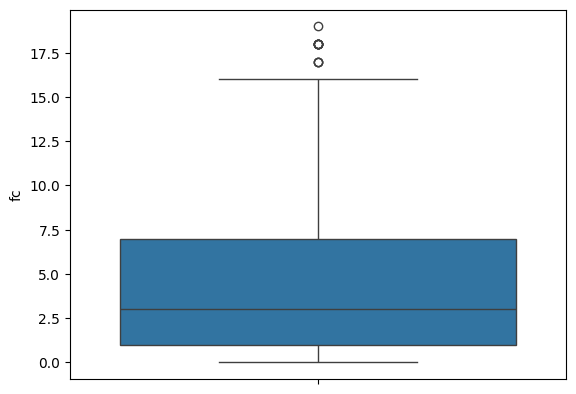

In [204]:
sns.boxplot(df_train['fc'])

<Axes: ylabel='three_g'>

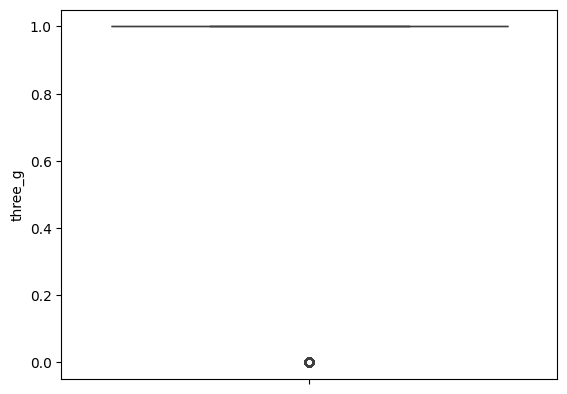

In [205]:
sns.boxplot(df_train['three_g'])

# Inter Quantile Range Method

##### Setelah dilakukan pengecekan terhadap seluruh kolom pada data_train ditemukan dakta bahwa terdapat outliner pada kolom fc dan three_g

##### Detect and Remove Outliers pada kolom fc

In [206]:
q1 = df_train['fc'].quantile(0.25)
q3 = df_train['fc'].quantile(0.75)
iqr = q3-q1

In [207]:
q1, q3, iqr

(1.0, 7.0, 6.0)

In [208]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-8.0, 16.0)

In [209]:
## trimming - delete the outliner data
new_df = df_train.loc[(df_train['fc'] <= upper_limit) & (df_train['fc'] >= lower_limit)]
print('before removing outliner : ', len(df_train))
print('after removing outliner : ', len(new_df))
print('outliner : ', len(df_train)-len(new_df))

before removing outliner :  1400
after removing outliner :  1389
outliner :  11


<Axes: ylabel='fc'>

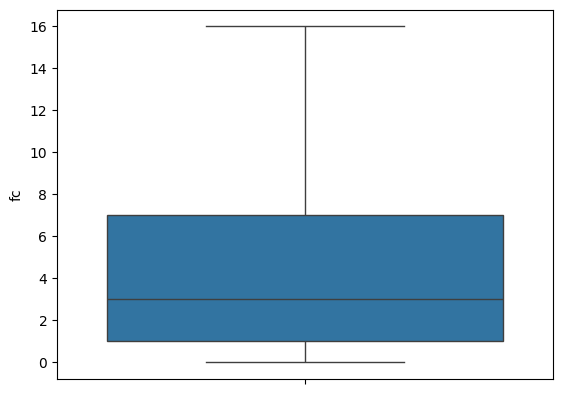

In [210]:
# Plot setelah outliner dihapus
sns.boxplot(new_df['fc'])

In [211]:
# capping - change the outliner values to uppor (or) lower limit values
new_df = df_train.copy()
new_df.loc[(new_df['fc'] >= upper_limit), 'fc'] = upper_limit
new_df.loc[(new_df['fc'] <= lower_limit), 'fc'] = lower_limit

##### Detect and Remove Outliers pada kolom three_g

In [212]:
q1 = df_train['three_g'].quantile(0.25)
q3 = df_train['three_g'].quantile(0.75)
iqr = q3-q1

In [213]:
q1, q3, iqr

(1.0, 1.0, 0.0)

In [214]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(1.0, 1.0)

In [215]:
## trimming - delete the outliner data
new_df = df_train.loc[(df_train['three_g'] <= upper_limit) & (df_train['three_g'] >= lower_limit)]
print('before removing outliner : ', len(df_train))
print('after removing outliner : ', len(new_df))
print('outliner : ', len(df_train)-len(new_df))

before removing outliner :  1400
after removing outliner :  1065
outliner :  335


<Axes: ylabel='three_g'>

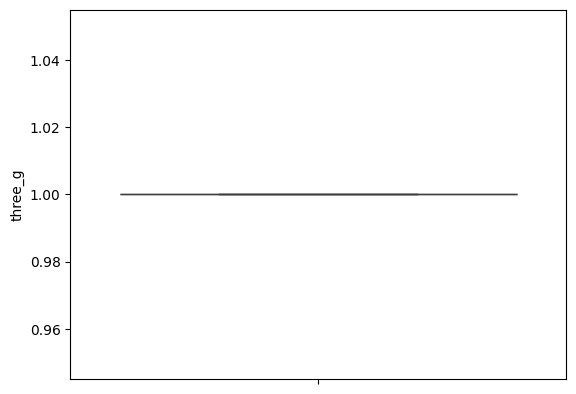

In [216]:
# Plot setelah outliner dihapus
sns.boxplot(new_df['three_g'])